# EDA Environmental features

In [1]:
# Loading packages and their components
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
data_subsets = pickle.load(open('cleaned_data.pickle', 'rb'))

# Splitting the data into their parts
sj_features_train, \
sj_features_test, \
sj_labels_train, \
iq_features_train, \
iq_features_test, \
iq_labels_train = data_subsets

In [5]:
print(f'sj rows train: {sj_features_train.shape[0]}')
print(f'sj rows test: {sj_features_test.shape[0]}')
print(f'sj rows combined: {sj_features_train.shape[0]+sj_features_test.shape[0]}')

print(f'iq rows train: {iq_features_train.shape[0]}')
print(f'iq rows test: {iq_features_test.shape[0]}')
print(f'iq rows combined: {iq_features_train.shape[0]+iq_features_test.shape[0]}')

sj rows train: 936
sj rows test: 260
sj rows combined: 1196
iq rows train: 520
iq rows test: 156
iq rows combined: 676


In [6]:
# get the fetatures (climate data) for the whole time (1990 - 2013)
# combine train and test set
sj_features = pd.concat([sj_features_train,sj_features_test], axis=0)
iq_features = pd.concat([iq_features_train,iq_features_test], axis=0)

print(f'sj_features rows: {sj_features.shape[0]}')
print(f'iq_features rows: {iq_features.shape[0]}')

sj_features rows: 1196
iq_features rows: 676


## Comparison temperature data from station and reanalysis
Different features from different sources (NOAA's GHCN daily climate data weather station measurements / NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale) / PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)) describe the same:
* Average temperature
* Min temperature
* Max temperature
* Diurnal Temperature Range

In [10]:
sj_features.station_avg_temp_c

week_start_date
1990-04-30    25.442857
1990-05-07    26.714286
1990-05-14    26.714286
1990-05-21    27.471429
1990-05-28    28.942857
                ...    
2013-03-26    27.542857
2013-04-02    26.642857
2013-04-09    27.914286
2013-04-16    27.728571
2013-04-23    26.442857
Name: station_avg_temp_c, Length: 1196, dtype: float64

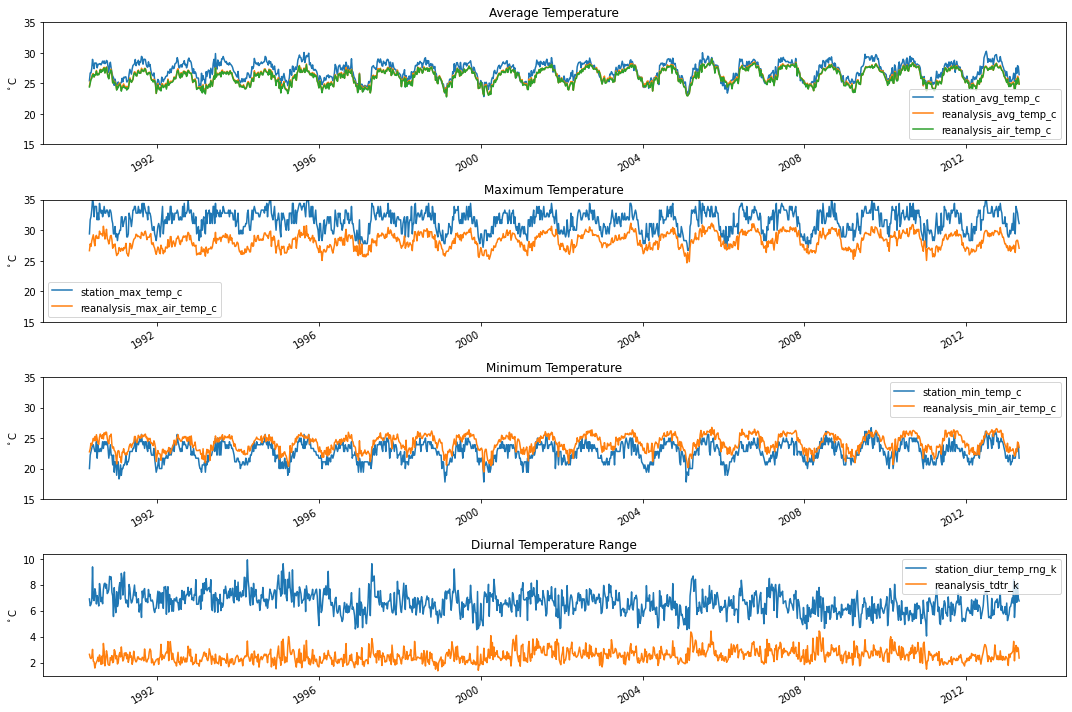

In [13]:
# Plot data
fig, ax = plt.subplots(4, 1, figsize=(15,10), tight_layout=True)

sj_features[['station_avg_temp_c','reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].plot(ax=ax[0])
ax[0].set(title='Average Temperature', ylabel=r'$^\circ$C', xlabel='', ylim=(15,35))

sj_features[['station_max_temp_c','reanalysis_max_air_temp_c']].plot(ax=ax[1])
ax[1].set(title='Maximum Temperature', ylabel=r'$^\circ$C', xlabel='', ylim=(15,35))

sj_features[['station_min_temp_c','reanalysis_min_air_temp_c']].plot(ax=ax[2])
ax[2].set(title='Minimum Temperature', ylabel=r'$^\circ$C', xlabel='', ylim=(15,35))

sj_features[['station_diur_temp_rng_k','reanalysis_tdtr_k']].plot(ax=ax[3])
ax[3].set(title='Diurnal Temperature Range', ylabel=r'$^\circ$C', xlabel='');

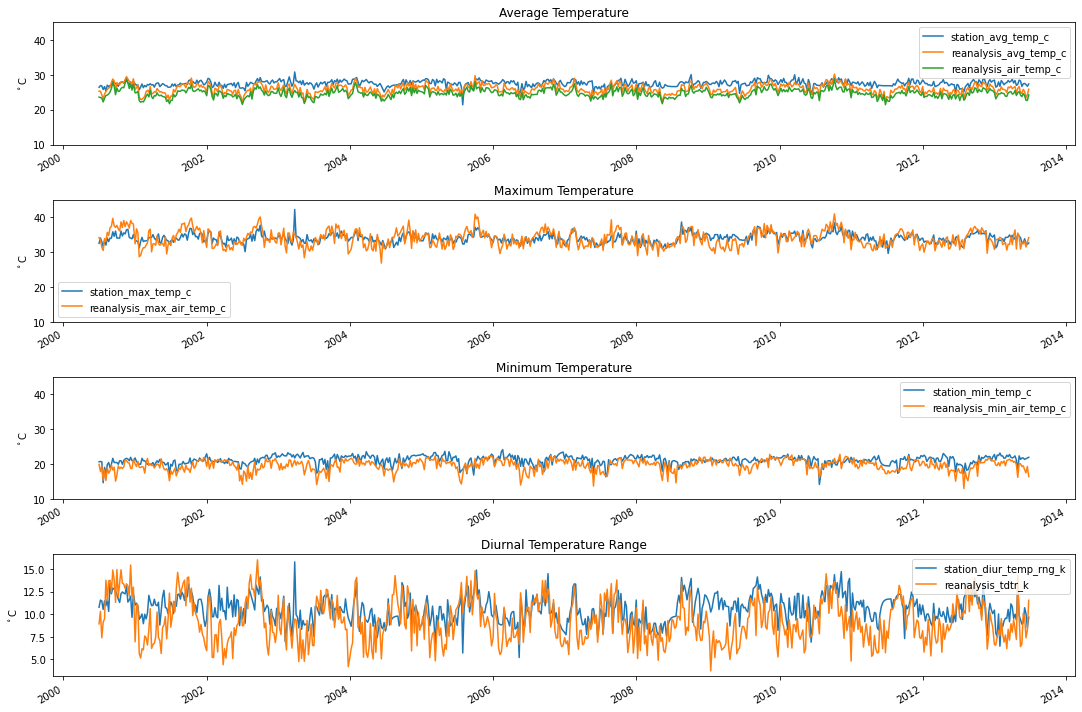

In [14]:
# Plot data
fig, ax = plt.subplots(4, 1, figsize=(15,10), tight_layout=True)

iq_features[['station_avg_temp_c','reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].plot(ax=ax[0], ylim=(10,45))
ax[0].set(title='Average Temperature', ylabel=r'$^\circ$C', xlabel='')

iq_features[['station_max_temp_c','reanalysis_max_air_temp_c']].plot(ax=ax[1], ylim=(10,45))
ax[1].set(title='Maximum Temperature', ylabel=r'$^\circ$C', xlabel='')

iq_features[['station_min_temp_c','reanalysis_min_air_temp_c']].plot(ax=ax[2], ylim=(10,45))
ax[2].set(title='Minimum Temperature', ylabel=r'$^\circ$C', xlabel='')

iq_features[['station_diur_temp_rng_k','reanalysis_tdtr_k']].plot(ax=ax[3])
ax[3].set(title='Diurnal Temperature Range', ylabel=r'$^\circ$C', xlabel='');

### Difference between `reanalysis_avg_temp_c` and `reanalysis_air_temp_c`

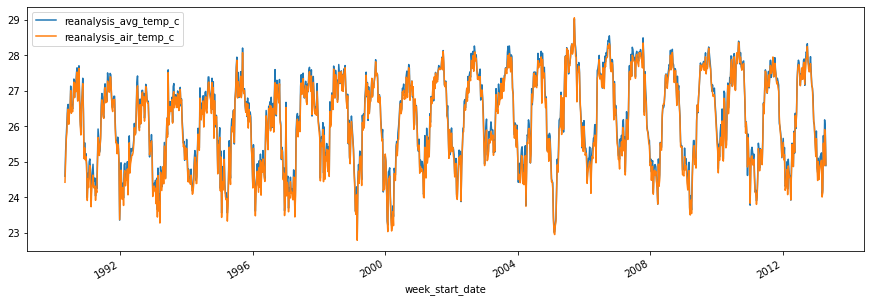

In [20]:
sj_features[['reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].plot(figsize=(15,5));

In [21]:
sj_features[['reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].sample(10)

,reanalysis_avg_temp_c,reanalysis_air_temp_c
week_start_date,,
2006-02-26,25.057143,24.905714
1998-09-24,27.035714,26.980000
2002-08-06,28.050000,27.852857
1994-06-25,26.485714,26.350000
2009-04-02,23.642857,23.542857
2002-06-11,26.814286,26.737143
1998-11-19,25.507143,25.525714
2007-09-03,28.092857,28.068571
2011-05-07,25.328571,25.342857


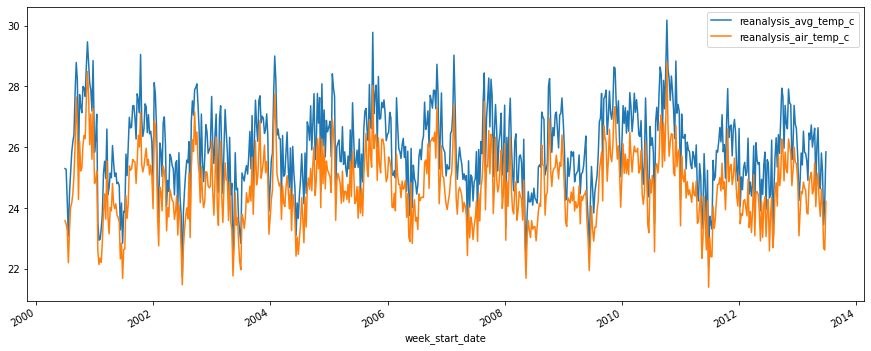

In [22]:
iq_features[['reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].plot(figsize=(15,6));

In [23]:
iq_features[['reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].sample(10)

,reanalysis_avg_temp_c,reanalysis_air_temp_c
week_start_date,,
2012-07-15,24.450000,23.784286
2005-03-26,26.678571,25.220000
2002-12-17,25.907143,24.668571
2008-05-27,24.542857,23.591429
2004-12-16,26.885714,25.551429
2011-01-29,26.421429,25.274286
2008-08-19,27.157143,26.078571
2006-05-07,25.871429,24.480000
2002-09-17,27.892857,27.170000


## Conclusion Temperature:
* `reanalysis_avg_temp_c` and `reanalysis_air_temp_c` in SJ almost similar, while in IQ little bit more diffenence (but same pattern)
* different features for same substance (check which features are best correlated for models)
    * average temperature
    * min temperature
    * max temperature
---

## Comparison of precipitation data from station and reanalysis

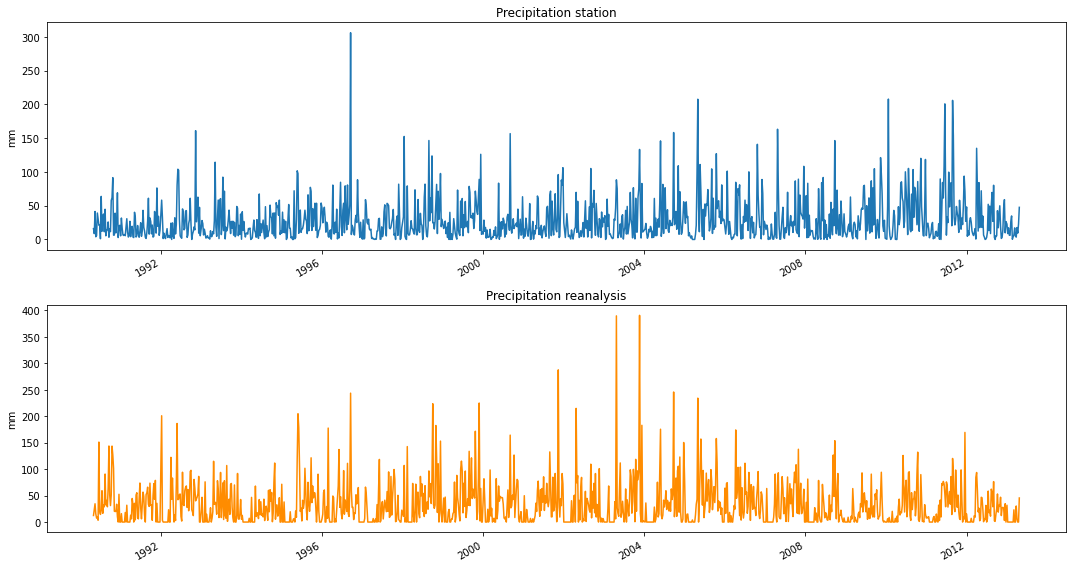

In [31]:
# Plot data
fig, ax = plt.subplots(2, 1, figsize=(15,8), tight_layout=True)

sj_features[['station_precip_mm']].plot(ax=ax[0], legend=False);
ax[0].set(title='Precipitation station', ylabel='mm', xlabel='');

sj_features[['reanalysis_sat_precip_amt_mm']].plot(ax=ax[1], legend=False, color='darkorange');
ax[1].set(title='Precipitation reanalysis', ylabel='mm', xlabel='');

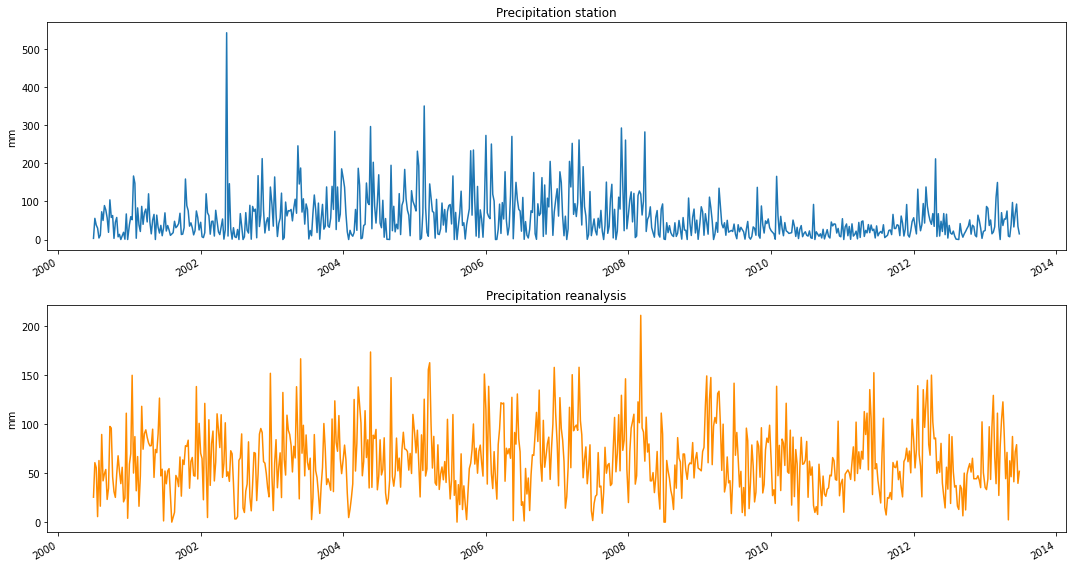

In [33]:
# Plot data
fig, ax = plt.subplots(2, 1, figsize=(15,8), tight_layout=True)

iq_features[['station_precip_mm']].plot(ax=ax[0], legend=False);
ax[0].set(title='Precipitation station', ylabel='mm', xlabel='');

iq_features[['reanalysis_sat_precip_amt_mm']].plot(ax=ax[1], legend=False, color='darkorange');
ax[1].set(title='Precipitation reanalysis', ylabel='mm', xlabel='');

## Conclusion precipitation
* no clear pattern in SJ or IQ 
* difference between `reanalysis_sat_precip_amt_mm`/`precipitation_amt_mm` and `station_precip_mm` (check which features are best correlated for models)
    
---

# Humidity

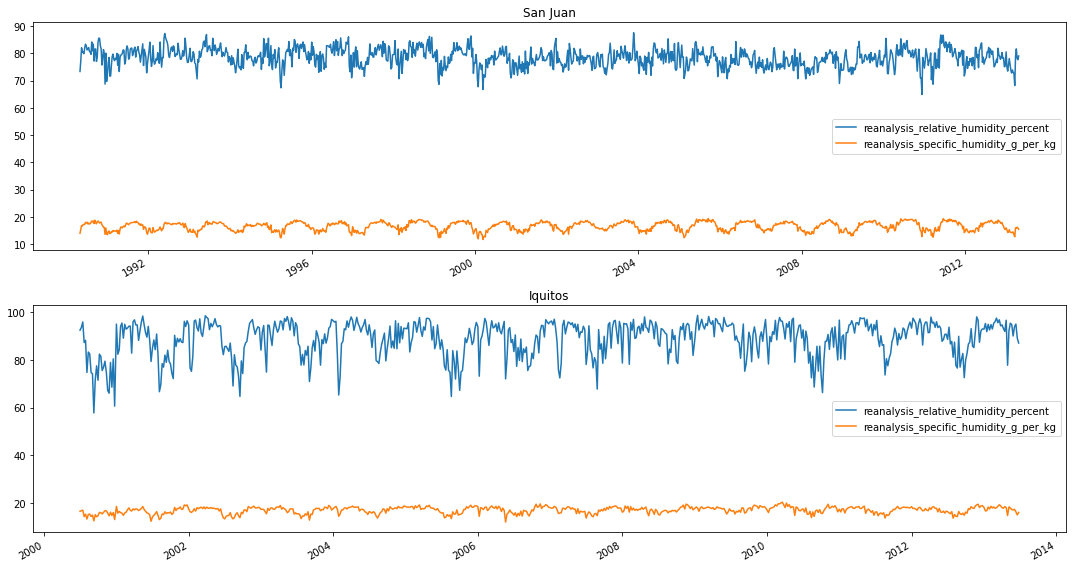

In [37]:
# Plot data
fig, ax = plt.subplots(2, 1, figsize=(15,8), tight_layout=True)

sj_features[['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']].plot(ax=ax[0]);
ax[0].set(title='San Juan', ylabel='', xlabel='');

iq_features[['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']].plot(ax=ax[1]);
ax[1].set(title='Iquitos', ylabel='', xlabel='');

## Conclusion humidity
* `reanalysis_specific_humidity_g_per_kg` affected by seasonality (clearly in SJ, more slightly in IQ) --> probably affected by other factors like temperature
* `reanalysis_relative_humidity_percent` in IQ slightly affected by seasonality, while in SJ more or less affected by seasonality (lot of noise)
---

## Average temperature in different years

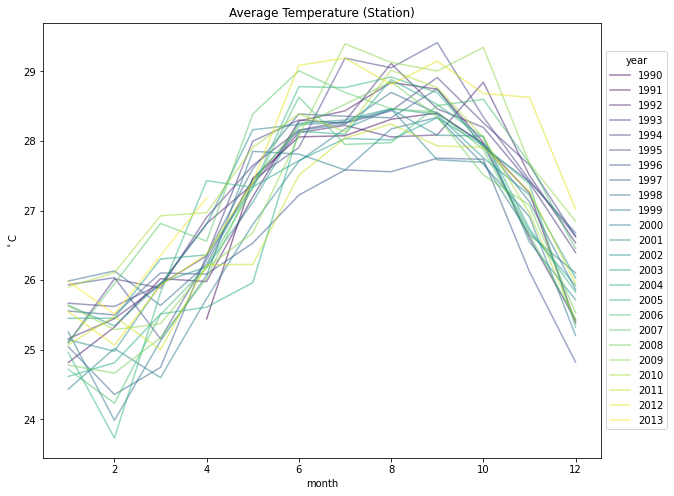

In [38]:
# Plot yearly seasonality
fig, ax = plt.subplots(figsize=(10,8)) 

pd.pivot_table(data=sj_features[['year', 'month', 'station_avg_temp_c']], index='month', columns='year') \
    ['station_avg_temp_c'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Average Temperature (Station)', ylabel=r'$^\circ$C');

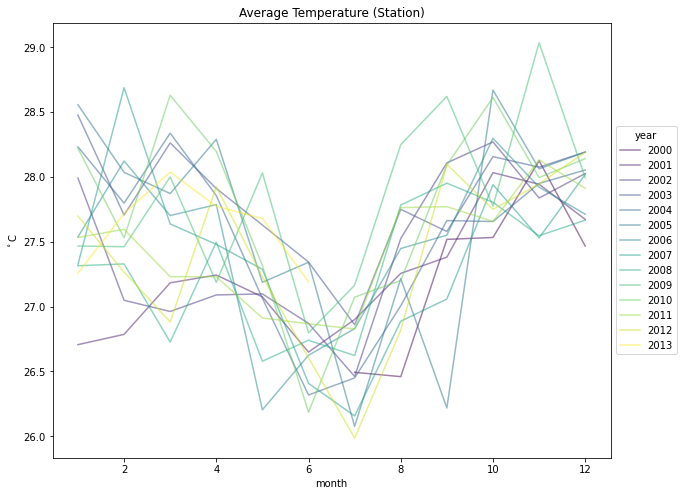

In [39]:
# Plot yearly seasonality
fig, ax = plt.subplots(figsize=(10,8)) 

pd.pivot_table(data=iq_features[['year', 'month', 'station_avg_temp_c']], index='month', columns='year') \
    ['station_avg_temp_c'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Average Temperature (Station)', ylabel=r'$^\circ$C');

---
# Climograph

In [40]:
# function to get mean values of different parameters per month
def get_pivot_monthly_df(data=sj_features , features=['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']):
    """
    Creates within the function a pivot table for each given feature (index = month, column = year) of 
    which the mean per month is calculated.
    Returns dataframe with mean values for each month. 
    """
    mean_pivot_df = pd.DataFrame(columns=features, index=range(1,13))
    for feat in range(len(features)):
        pivot_df = pd.pivot_table(data=data[['year', 'month', features[feat]]], index='month', columns='year')
        for month in range(0,12):
            mean_pivot_df.iloc[month, feat] = (pivot_df.iloc[month,:].mean())
    mean_pivot_df.index = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    return mean_pivot_df

In [41]:
# get the mean values of temperatures and precipitation per month for SJ
mean_sj = get_pivot_monthly_df(data=sj_features, 
                               features=['station_avg_temp_c', 'station_max_temp_c', 
                                         'station_min_temp_c', 'station_precip_mm'])

# get the mean values of temperatures and precipitation per month for IQ
mean_iq = get_pivot_monthly_df(data=iq_features, 
                               features=['station_avg_temp_c', 'station_max_temp_c', 
                                         'station_min_temp_c', 'station_precip_mm'])

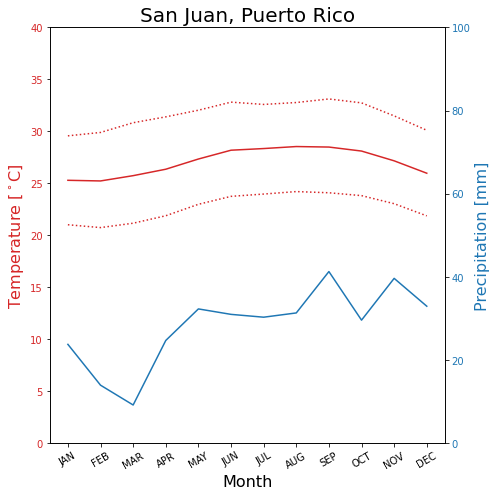

In [42]:
# plot SJ 
fig, ax1 = plt.subplots(figsize=(7,7))

# first axis: temperature
color = 'tab:red'
ax1.set_title('San Juan, Puerto Rico', fontsize=20)
ax1.set_xlabel('Month', fontsize=16)
ax1.tick_params(axis='x', labelrotation=30)
ax1.set_ylabel(r'Temperature [$^\circ$C]', color=color, fontsize=16)
ax1.set_ylim(0,40)
ax1.plot(mean_sj.index, mean_sj['station_avg_temp_c'], color=color)
ax1.plot(mean_sj.index, mean_sj['station_max_temp_c'], color=color, ls=':')
ax1.plot(mean_sj.index, mean_sj['station_min_temp_c'], color=color, ls=':')
ax1.tick_params(axis='y', labelcolor=color)

# second axis: precipitation
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue' 
ax2.set_ylabel('Precipitation [mm]', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.plot(mean_sj.index, mean_sj['station_precip_mm'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/SanJuan_climatogram.png', dpi=100)

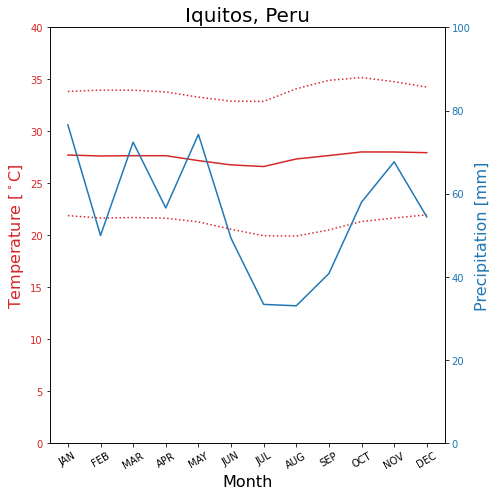

In [43]:
# plot IQ 
fig, ax1 = plt.subplots(figsize=(7,7))

# first axis: temperature
color = 'tab:red'
ax1.set_title('Iquitos, Peru', fontsize=20)
ax1.set_xlabel('Month', fontsize=16)
ax1.tick_params(axis='x', labelrotation=30)
ax1.set_ylabel(r'Temperature [$^\circ$C]', color=color, fontsize=16)
ax1.set_ylim(0,40)
ax1.plot(mean_iq.index, mean_iq['station_avg_temp_c'], color=color)
ax1.plot(mean_iq.index, mean_iq['station_max_temp_c'], color=color, ls=':')
ax1.plot(mean_iq.index, mean_iq['station_min_temp_c'], color=color, ls=':')
ax1.tick_params(axis='y', labelcolor=color)

# second axis: precipitation
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue' 
ax2.set_ylabel('Precipitation [mm]', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.plot(mean_iq.index, mean_iq['station_precip_mm'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/Iquitos_climatogram.png', dpi=100)

---

# Vegetation 
Satellite vegetation - Normalized difference vegetation index (NDVI)

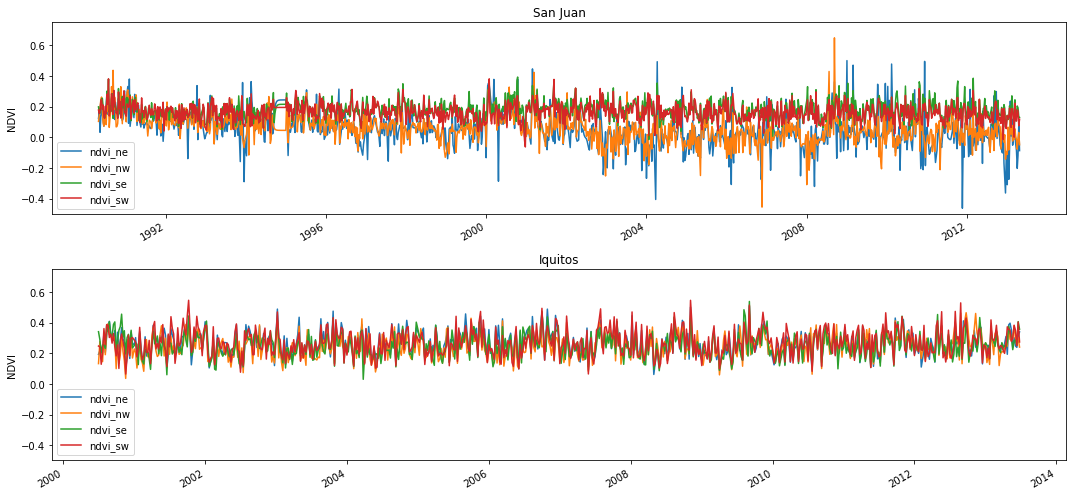

In [44]:
# Plot data
fig, ax = plt.subplots(2, 1, tight_layout=True)

sj_features[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].plot(figsize=(15,7), ax=ax[0]);
ax[0].set(title='San Juan', ylabel='NDVI', xlabel='', ylim=(-0.5,0.75));

iq_features[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].plot(figsize=(15,7), ax=ax[1]);
ax[1].set(title='Iquitos', ylabel='NDVI', xlabel='', ylim=(-0.5,0.75));

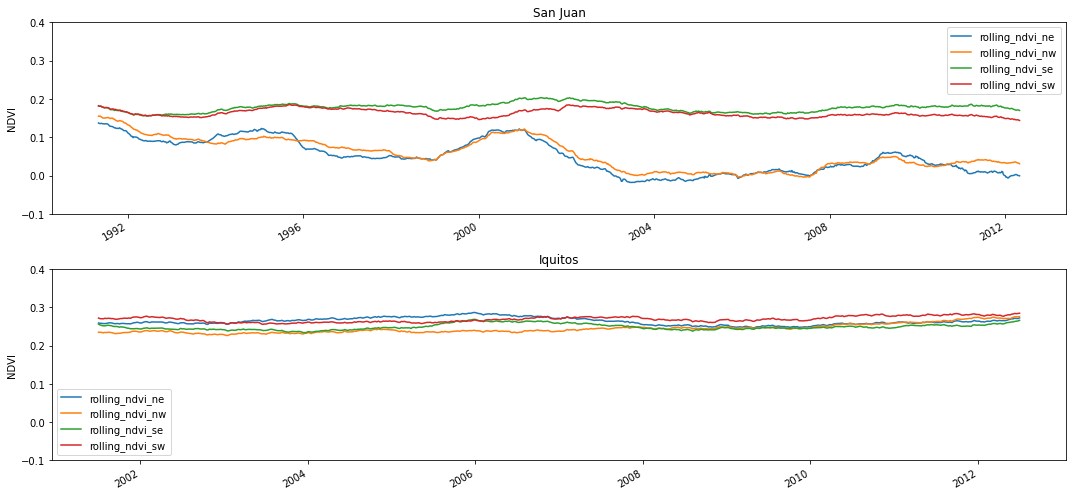

In [45]:
# generate a plot with rolling mean to get rid of the noise

# set the window for the rolling mean (prevent repeatedly setting the number below)
rolling_window = 104
fig, ax = plt.subplots(2, 1, tight_layout=True);

(
    sj_features[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']]
    .assign(rolling_ndvi_ne = lambda df: df['ndvi_ne'].rolling(rolling_window, center=True).mean())
    .assign(rolling_ndvi_nw = lambda df: df['ndvi_nw'].rolling(rolling_window, center=True).mean())
    .assign(rolling_ndvi_se = lambda df: df['ndvi_se'].rolling(rolling_window, center=True).mean())
    .assign(rolling_ndvi_sw = lambda df: df['ndvi_sw'].rolling(rolling_window, center=True).mean())
    .drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1)
    .plot(figsize=(15,7), ax=ax[0], ylim=(-0.1,0.4), ylabel='NDVI', xlabel='', title='San Juan')
);

(
    iq_features[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']]
    .assign(rolling_ndvi_ne = lambda df: df['ndvi_ne'].rolling(rolling_window, center=True).mean())
    .assign(rolling_ndvi_nw = lambda df: df['ndvi_nw'].rolling(rolling_window, center=True).mean())
    .assign(rolling_ndvi_se = lambda df: df['ndvi_se'].rolling(rolling_window, center=True).mean())
    .assign(rolling_ndvi_sw = lambda df: df['ndvi_sw'].rolling(rolling_window, center=True).mean())
    .drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1)
    .plot(figsize=(15,7), ax=ax[1], ylim=(-0.1,0.4), ylabel='NDVI', xlabel='', title='Iquitos')
);

---

# Function to plot a certain year and ceartain parameters
Function is also in `own_functions.py`

In [48]:
def plotting_time_feat(df, features, start, stop, scaler=False):
    """
    Function subsets input dataframe to features and further to a certain time period and plots selected features.
    Features can be scaled by the StandardScaler of sklearn. 
    If observation period should be one year set start and stop to the same year
    ----------
    Parameters
    
    df: dataframe with time as index
    features: list of feature names (column names) which should be plotted
    start: str of start point of the plot. Either year (e.g. '2001') or year month combination (e.g. '2001-01')
    stop: str of end point of the plot. Formated like start. 
    scaler: bool, (default False) if True StandardScaler of sklearn will be applied to features.
    
    """
    df1 = df[features]
    df2 = df1[start:stop]
    
    if scaler:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        df_plot = scaler.fit_transform(df2)
        df_plot = pd.DataFrame(df_plot, columns=df2.columns, index=df2.index)
    else:
        df_plot = df2
    
    fig, ax = plt.subplots(figsize=(10,5))
    df_plot.plot(ax=ax);
    ax.set_title(f'From {start} to {stop}', fontsize=16)
    ax.set_xlabel('Time', fontsize=14)
    ax.tick_params(axis='x', labelrotation=30)
    if scaler:
        ax.set_title(f'From {start} to {stop} (Scaled)', fontsize=16)
    else:
        ax.set_title(f'From {start} to {stop}', fontsize=16)

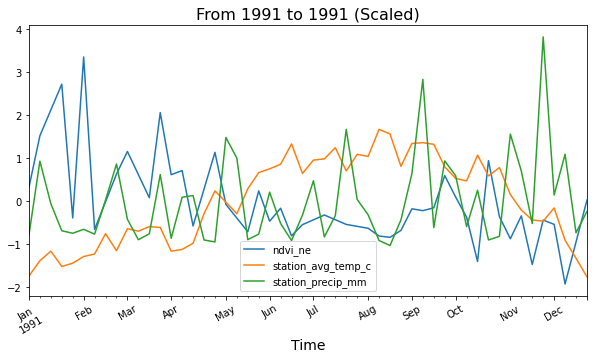

In [49]:
plotting_time_feat(sj_features, ['ndvi_ne', 'station_avg_temp_c', 'station_precip_mm'], '1991', '1991', scaler=True)